In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_buy_not.csv to train_buy_not.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
buy_not_train = pd.read_csv('/content/train_buy_not.csv')

In [ ]:
buy_not_test = pd.read_csv('/content/test_buy_not.csv')

In [ ]:
buy_not_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
buy_not_train.shape

(614, 13)

In [ ]:
buy_not_test.shape

(367, 12)

In [ ]:
buy_not_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
buy_not_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


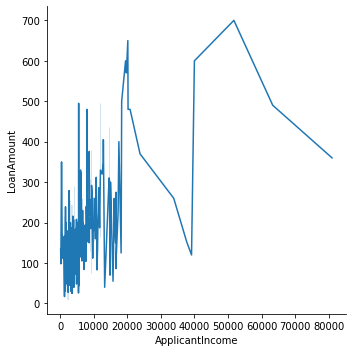

In [ ]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',kind='line',data=buy_not_train,sort=True)

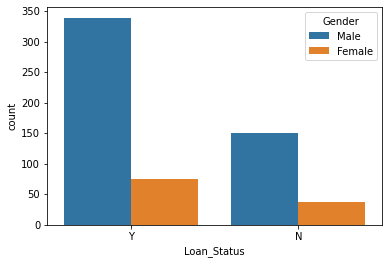

In [ ]:
sns.countplot(x='Loan_Status',hue='Gender',data=buy_not_train)

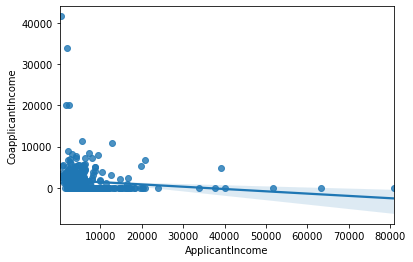

In [ ]:
sns.regplot(x='ApplicantIncome',y='CoapplicantIncome',data=buy_not_train)

In [ ]:
# encoding train data 
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols:
  if col in buy_not_train.columns:
     i = buy_not_train.columns.get_loc(col)
     buy_not_train.iloc[:,i] =le.fit_transform(buy_not_train.iloc[:,i].astype(str))


  
    
       
        

In [ ]:
buy_not_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
# encoding test data 
cols = ['Gender','Married','Education','Self_Employed','Property_Area']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols:
  if col in buy_not_test.columns:
     i = buy_not_test.columns.get_loc(col)
     buy_not_test.iloc[:,i] =le.fit_transform(buy_not_test.iloc[:,i].astype(str))


In [ ]:
buy_not_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


In [ ]:
# sum of null value in train set 
null_columns=buy_not_train.columns[buy_not_train.isnull().any()]

buy_not_train[null_columns].isnull().sum()

Dependents          15
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [ ]:
# sum of null value in test set 
null_columns=buy_not_test.columns[buy_not_test.isnull().any()]

buy_not_test[null_columns].isnull().sum()

Dependents          10
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

In [ ]:
# Handling Misssing values in train data 
cols = ['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']
buy_not_train.replace('?',np.NaN,inplace=True)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)

for col in cols:
  if col in buy_not_train.columns:
    imp=imp.fit(buy_not_train[[col]])
    buy_not_train[col]=imp.transform(buy_not_train[[col]]).ravel()




In [ ]:
buy_not_train.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
# Handling Misssing values in test data 
cols = ['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']
buy_not_test.replace('?',np.NaN,inplace=True)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)

for col in cols:
  if col in buy_not_test.columns:
    imp=imp.fit(buy_not_test[[col]])
    buy_not_test[col]=imp.transform(buy_not_test[[col]]).ravel()


In [ ]:
buy_not_test.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [ ]:
corr = buy_not_train.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.174520,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,0.336094,1.000000,0.333632,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.174520,0.333632,1.000000,0.058317,0.021713,0.118358,0.027171,0.160767,-0.098048,-0.046995,0.006750,0.006685
Education,0.024382,0.006759,0.058317,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.021713,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.118358,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.027171,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.136081,0.145541,0.160767,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.067778,-0.096253,-0.098048,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.000490,0.010302,-0.046995,-0.077936,0.052701,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


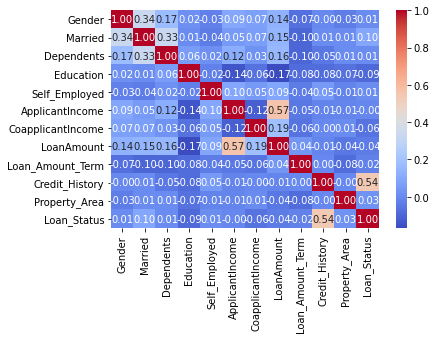

In [ ]:
# corr relation map 
sns.heatmap(corr,annot=True, fmt = ".2f", cmap = "coolwarm")

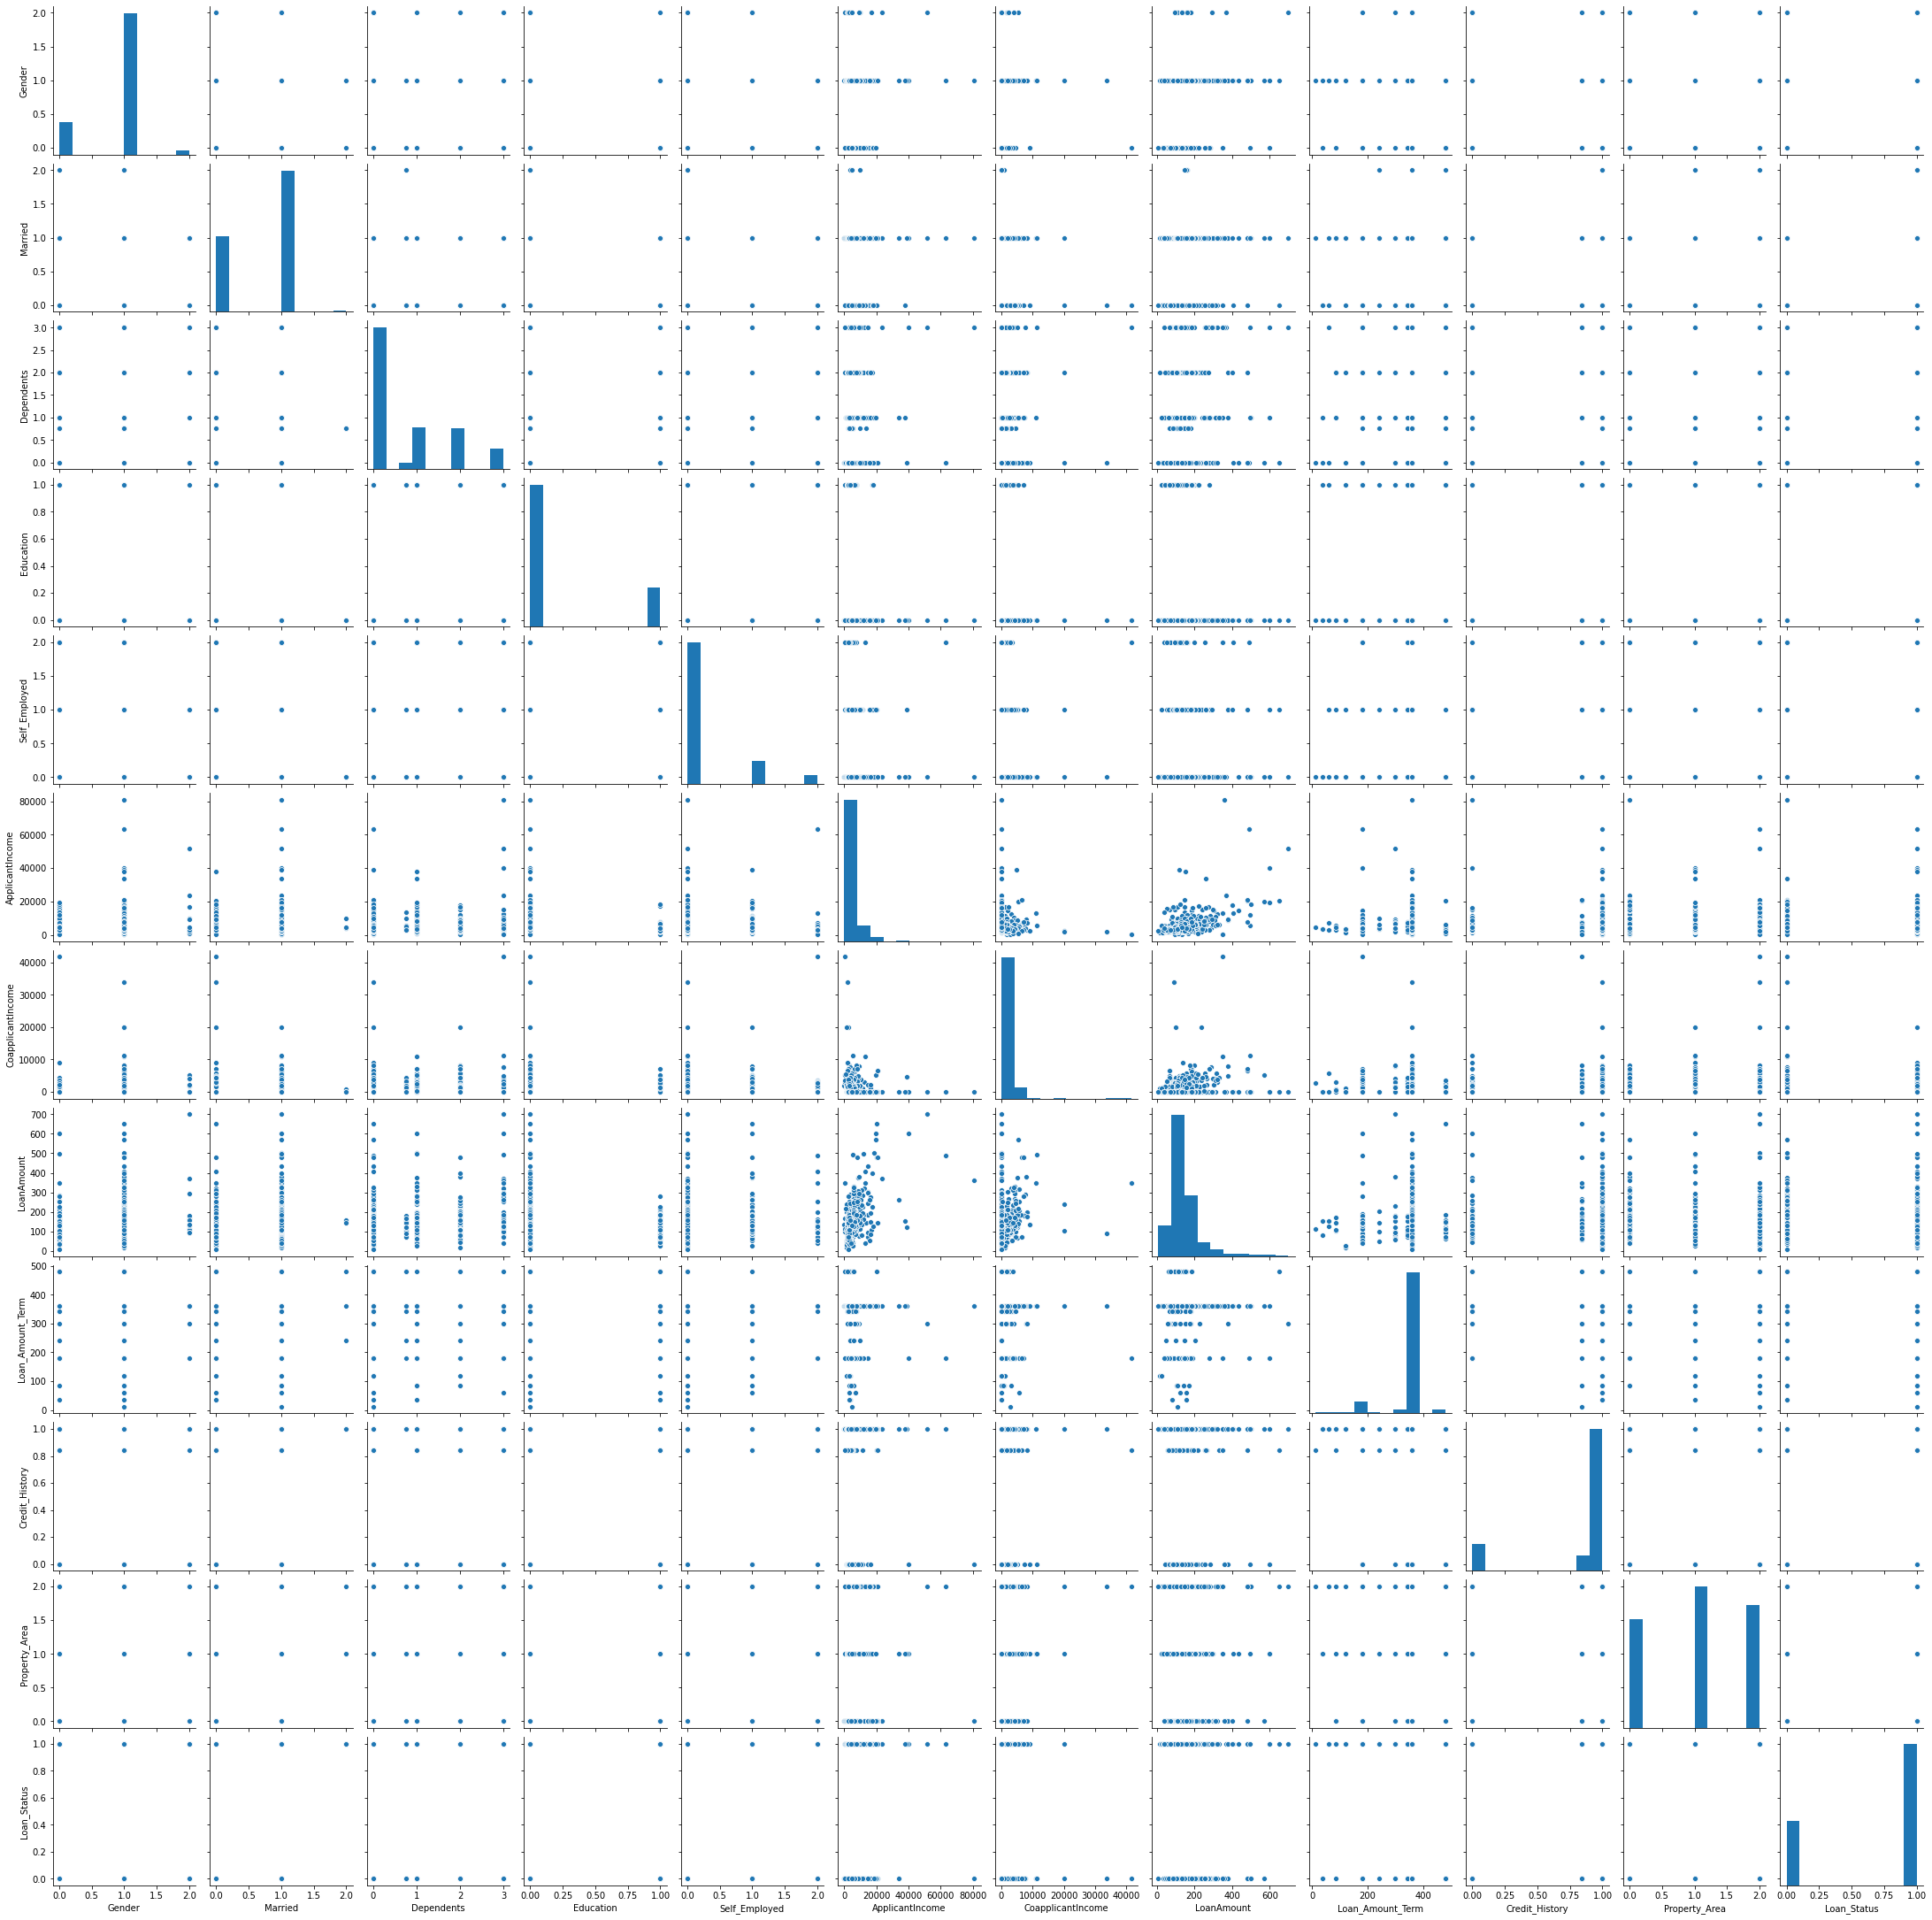

In [ ]:
# can also view relationship with help of sns pairplot
sns.pairplot(buy_not_train)

In [ ]:
buy_not_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(buy_not_train.drop(['Loan_Status','Loan_ID'],axis=1), 
                                                    buy_not_train['Loan_Status'], test_size=0.25, 
                                                    random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62        55
           1       0.77      0.99      0.86        99

    accuracy                           0.80       154
   macro avg       0.86      0.72      0.74       154
weighted avg       0.84      0.80      0.78       154



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.22 %
Standard Deviation: 6.07 %


In [ ]:
id = buy_not_test['Loan_ID']
predictions = classifier.predict(buy_not_test.drop('Loan_ID', axis=1))
result = pd.DataFrame({ 'Loan_ID' : id, 'Loan_Status': predictions })
result

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
result.to_csv('loan-pred.csv', index = False)